In [91]:
import sys
sys.path.append('../..')

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread
import cv2

from gen.load_data import load_data
from gen.datagen import oversample_generator_from_df


In [26]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../../data')


In [27]:
train_df.head()

image                   id  \
0  ../../data/Train/CameraRGB/episode_0002_000287...  episode_0002_000287   
1  ../../data/Train/CameraRGB/episode_0008_000112...  episode_0008_000112   
2                 ../../data/Train/CameraRGB/804.png                  804   
3  ../../data/Train/CameraRGB/episode_0008_000286...  episode_0008_000286   
4  ../../data/Train/CameraRGB/episode_0003_000261...  episode_0003_000261   

                                               label  
0  ../../data/Train/CameraSeg/episode_0002_000287...  
1  ../../data/Train/CameraSeg/episode_0008_000112...  
2                 ../../data/Train/CameraSeg/804.png  
3  ../../data/Train/CameraSeg/episode_0008_000286...  
4  ../../data/Train/CameraSeg/episode_0003_000261...

In [28]:
valid_df.head()

image     id  \
0  ../../data/Valid/CameraRGB/00019.png  00019   
1  ../../data/Valid/CameraRGB/00413.png  00413   
2  ../../data/Valid/CameraRGB/00035.png  00035   
3  ../../data/Valid/CameraRGB/00264.png  00264   
4  ../../data/Valid/CameraRGB/00172.png  00172   

                                  label  
0  ../../data/Valid/CameraSeg/00019.png  
1  ../../data/Valid/CameraSeg/00413.png  
2  ../../data/Valid/CameraSeg/00035.png  
3  ../../data/Valid/CameraSeg/00264.png  
4  ../../data/Valid/CameraSeg/00172.png

In [29]:
test_df.head()

image     id  \
0  ../../data/Test/CameraRGB/00019.png  00019   
1  ../../data/Test/CameraRGB/00413.png  00413   
2  ../../data/Test/CameraRGB/00035.png  00035   
3  ../../data/Test/CameraRGB/00264.png  00264   
4  ../../data/Test/CameraRGB/00172.png  00172   

                                 label  
0  ../../data/Test/CameraSeg/00019.png  
1  ../../data/Test/CameraSeg/00413.png  
2  ../../data/Test/CameraSeg/00035.png  
3  ../../data/Test/CameraSeg/00264.png  
4  ../../data/Test/CameraSeg/00172.png

In [75]:
from skimage.io import imread
from gen.datagen import preprocess_label

weights = []
for _, row in train_df.iterrows():
    lbl = preprocess_label(imread(row['label']))
    xd, yd = lbl[:, :, 0].nonzero()
    if xd.shape[0] > 0 and yd.shape[0] > 0:
        weights.append( 1 + (xd.max() - xd.min()) * (yd.max() - yd.min()) )
    else:
        weights.append(1)

weights = np.array(weights)
weights = [float(i)/sum(weights) for i in weights]

In [87]:
gen = oversample_generator_from_df(train_df, 12, (480, 480), weights)

Random sample wiht replacment


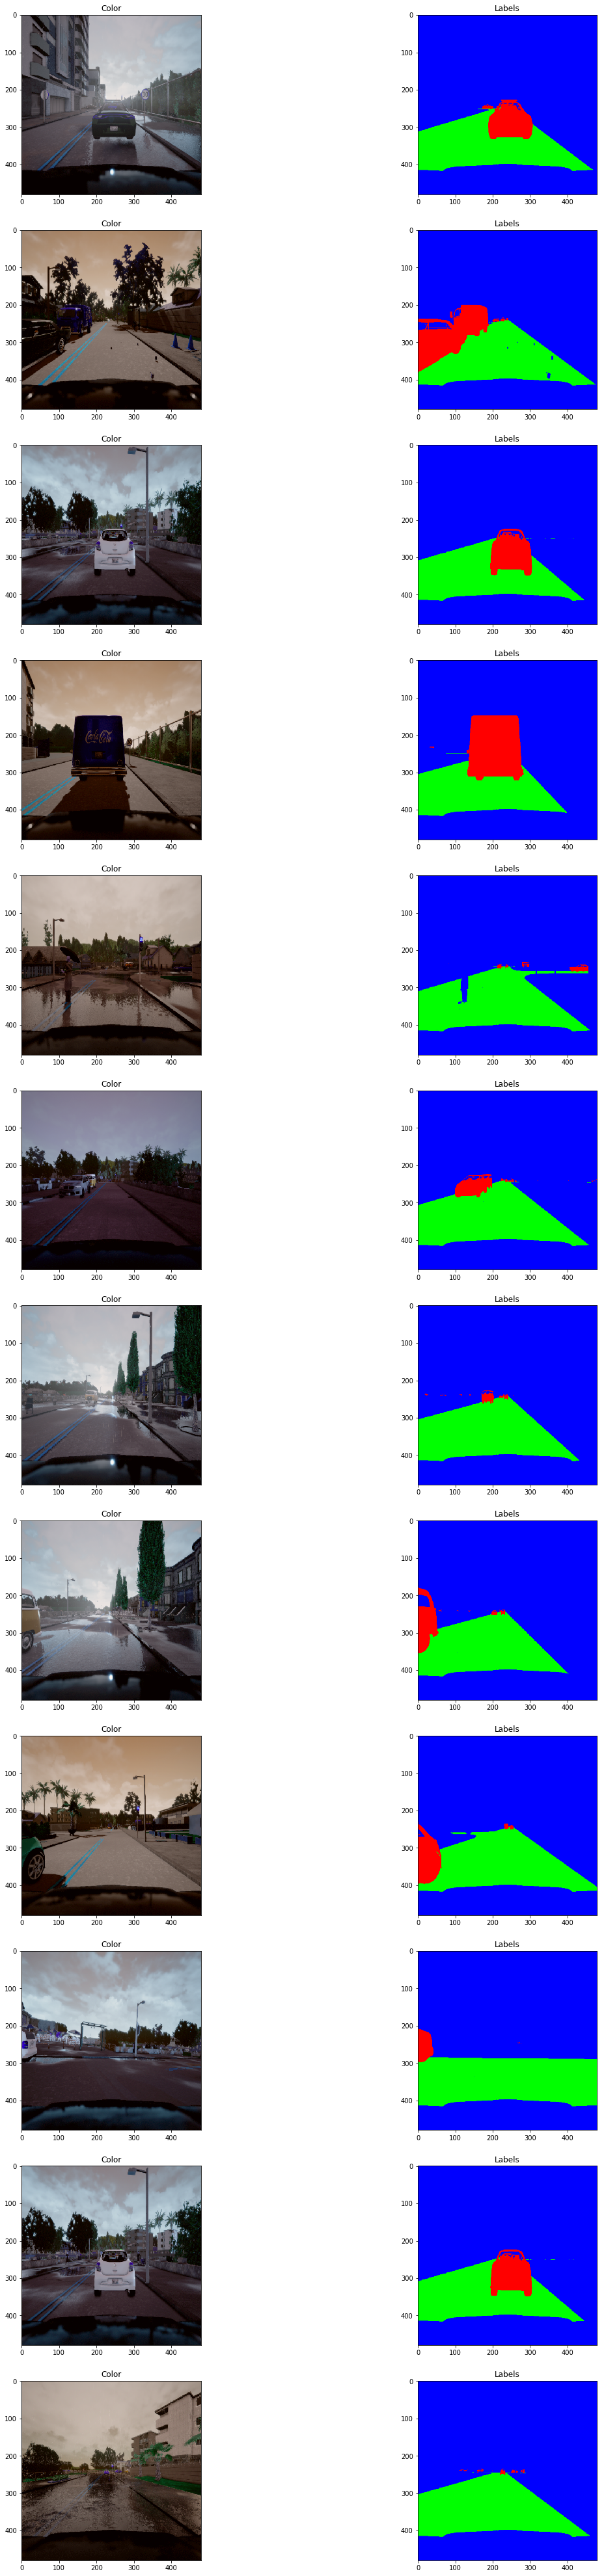

In [88]:
def plot_next_batch():
    X, Y = next(gen)

    sample_rows = 12
    fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
    for (ax1, ax2), rgb_img, lab_img in zip(m_axs, X, Y):
        img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
        lab_img = np.clip(lab_img*255, 0, 255).astype(np.uint8)
        ax1.imshow(img)
        ax1.set_title('Color')
        ax2.imshow(lab_img[:, :, 0:3])
        ax2.set_title('Labels')
plot_next_batch()

In [89]:
plot_next_batch()

Random sample wiht replacment


In [90]:
plot_next_batch()

Random sample wiht replacment


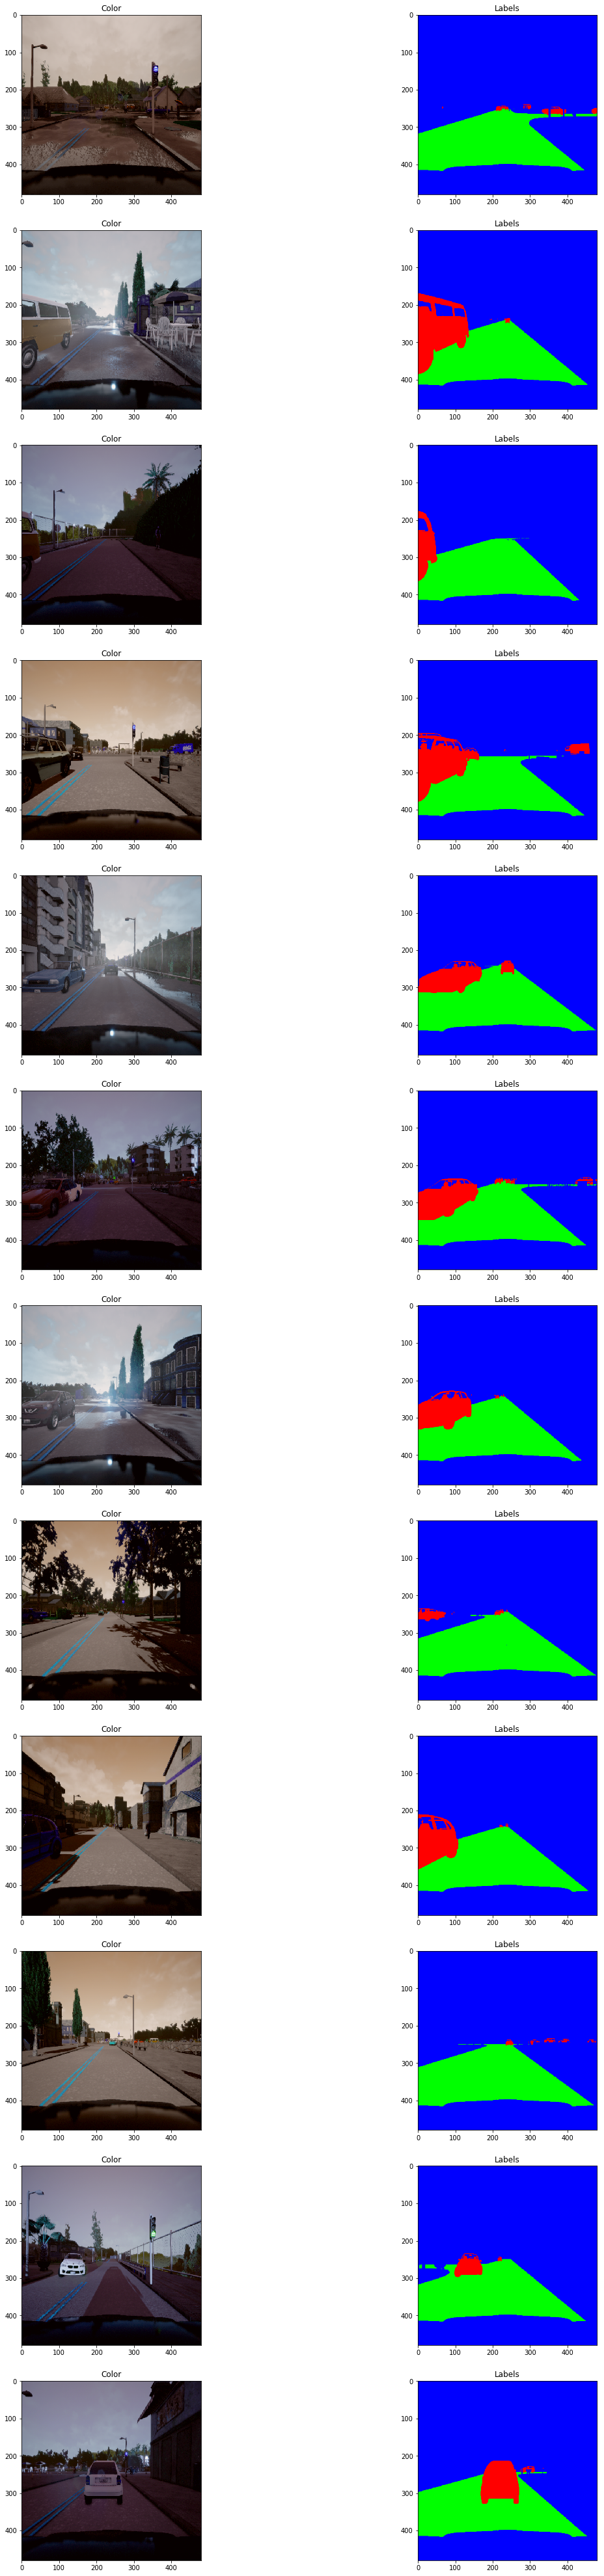

In [86]:
plot_next_batch()

In [ ]:

from gen.generators import preprocess_label

bg, road, cars = 0, 0, 0
for i, row in train_df.sample(2500).iterrows():
    l = preprocess_label(imread(row['label']))
    
    cars += l[:, :, 0].nonzero()[1].shape[0]
    road += l[:, :, 1].nonzero()[1].shape[0]
    bg   += l[:, :, 2].nonzero()[1].shape[0]

print (bg, road, cars)

t = bg + road + cars
car_p = cars/t
road_p = road/t
bg_p = bg/t

In [ ]:
print ("Car {}%, Road {}%, BG {}%".format(car_p, road_p, bg_p))

In [ ]:
t = cars+bg+road
p_car = t/cars
p_road = t/road
p_bg = t/bg

print(p_car, p_road, p_bg)

In [ ]:
(rgb_batch, lab_batch) = next(train_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(cv2.cvtColor(r_rgb_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')